In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import BasicAer
from qiskit import execute
from qiskit.tools.visualization import plot_histogram
from IBMQuantumExperience.IBMQuantumExperience import IBMQuantumExperience
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from math import *

{'11': 77, '10': 182, '01': 192, '00': 573}


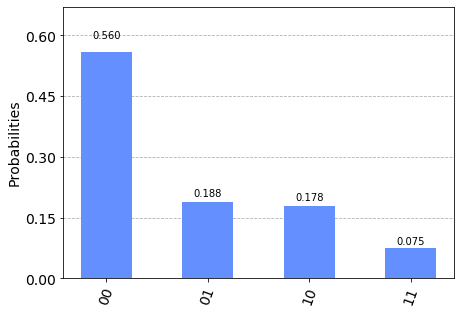

In [12]:
x = QuantumRegister(4)
y = QuantumRegister(2)
c = ClassicalRegister(2, "c")
qc = QuantumCircuit(x, y, c, name="truth_table1")

qc.h(x[0]) 
qc.h(x[1]) 
qc.h(x[2]) 
qc.h(x[3]) 

# OU
#qc.x(y[0]) 
#qc.x(y[1]) 

qc.ccx(x[0],x[1],y[0]) 
qc.ccx(x[2],x[3],y[1]) 

qc.measure(y[0], c[0])
qc.measure(y[1], c[1])

backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts  = result.get_counts(qc)
print(counts)
plot_histogram(counts)

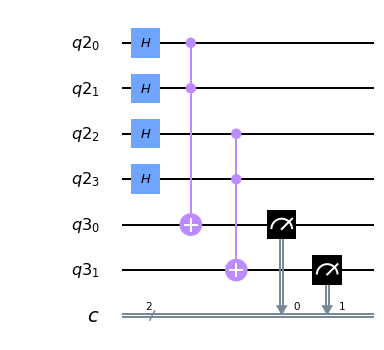

In [13]:
qc.draw(output='mpl')

In [ ]:
token = open("../ibm_token.txt","r").read().strip()
IBMQ.enable_account(token)

In [23]:
shots = 1024

provider = IBMQ.get_provider()
print(provider.backends())
backend  = provider.get_backend('ibmq_belem')

job_exp = execute(qc, backend=backend, shots=shots)
job_monitor(job_exp)

Job Status: job has successfully run


In [24]:
result_exp = job_exp.result()
print(result_exp)

Result(backend_name='ibmq_16_melbourne', backend_version='2.0.5', date=datetime.datetime(2020, 2, 29, 4, 30, 55, tzinfo=datetime.timezone.utc), execution_id='438f36ae-5aac-11ea-bcd0-002590bdc3da', header=Obj(backend_name='ibmq_16_melbourne', backend_version='2.0.5'), job_id='5e59e8c90f7cd900195bef8e', qobj_id='17c3439e-6787-4da2-87be-1c21ca35b062', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=321, 0x1=330, 0x2=180, 0x3=193)), header=Obj(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], memory_slots=2, n_qubits=15, name='truth_table1', qreg_sizes=[['q', 15]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4], ['q', 5], ['q', 6], ['q', 7], ['q', 8], ['q', 9], ['q', 10], ['q', 11], ['q', 12], ['q', 13], ['q', 14]]), meas_level=2, memory=False, shots=1024, success=True)], status='Successful completion', success=True, time_taken=6.513331174850464)


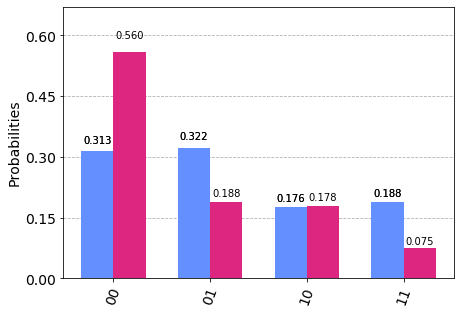

In [25]:
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts])